In [426]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Available features and their descriptions
Case_Id : Storing Unique ids with respect to cases
Hospital_Code : Unique Code for Hospitals in which particular case is being investigated
Hospital_type_code : Unique Code for Type of Hospitals
Hospital_region_code : Region of Hospitals
Available Extra Rooms in Hospital : No. of extra rooms available
Department : Department overlooking the case
Ward_Type : Unique code for ward type
Ward_Facility_Code : Unique code for ward facility
Bed Grade : Condition for Bed in Hospital
Patient_Id : Patient id undergoing current case
City_Code_Patient : City code for the patient
Type_of_Admission : Admission type registered by hospital
Severity of illness : severity recorded at time of admission
Visitors with Patient : No. of visitors with patient
Age : Age of the patient
Admission_Deposit : Deposit at admission time
Stay : Target Variable Stay which depicts no. of days the patient stayed at hospital

## 2. Reading the training and testing datasets

In [427]:
#Reading data

raw_train_data = pd.read_csv('/Users/mayuraitavadekar/Desktop/fall-2021/fds/project/lengthOfStay/data/train_data.csv')
raw_test_data = pd.read_csv('/Users/mayuraitavadekar/Desktop/fall-2021/fds/project/lengthOfStay/data/test_data.csv')

# raw_train_data = pd.read_csv('/Users/nikhilkarve/Desktop/study/fall2021/FDS/Project/healthcare/data/train_data.csv')
# raw_test_data = pd.read_csv('/Users/nikhilkarve/Desktop/study/fall2021/FDS/Project/healthcare/data/test_data.csv')

## 3. Data Understanding

> 3.1 Display the raw dataset

> 3.2 Understanding descriptive features

> 3.3 Understand the data types



### 3.1 Display Raw Dataset

In [428]:
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


#### By observing data we can see that we don't need case_id and hospital_code

### 3.2 Understanding Descriptive Featuers

In [429]:
raw_train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [430]:
raw_train_data.shape

(318438, 18)

In [431]:
raw_train_data['Admission_Deposit']

0         4911.0
1         5954.0
2         4745.0
3         7272.0
4         5558.0
           ...  
318433    4144.0
318434    6699.0
318435    4235.0
318436    3761.0
318437    4752.0
Name: Admission_Deposit, Length: 318438, dtype: float64

### 3.3 Understand the data types

In [432]:
raw_train_data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

## 4. Data Exploration

> 4.1 Prepare Data Quality Report

>> 4.1.1 Data Quality Report for Categorical Descriptive Features
    
>> 4.1.2 Data Quality Report for Continuous Descritive Features

> 4.2 Data Visualization

> 4.3 Determine the Data Quality Issues - Missing Values and Outliers

> 4.4 Handling Data Quality Issues

### 4.1 Prepare Data Quality Report

In [433]:
cat_features = raw_train_data.select_dtypes(include='object')

In [434]:
cat_features = list(cat_features.columns)

In [435]:
# we have some features whose values are numeric but need to be considered as categorical. we will append them.

In [436]:
cat_features.append('Hospital_code')
cat_features.append('City_Code_Hospital')

In [437]:
cat_features.append('Bed Grade')
cat_features.append('City_Code_Patient')

In [438]:
cat_features.append('Available Extra Rooms in Hospital')
cat_features.append('Visitors with Patient')

In [439]:
cat_features

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Hospital_code',
 'City_Code_Hospital',
 'Bed Grade',
 'City_Code_Patient',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient']

In [440]:
#cat_features.remove('Bed Grade')

In [441]:
cat_features.remove('City_Code_Hospital')

In [442]:
# following are available categorical features

In [443]:
cat_features

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Hospital_code',
 'Bed Grade',
 'City_Code_Patient',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient']

In [444]:
print('There are total {} categorical features in the data'.format(len(cat_features)))

There are total 14 categorical features in the data


In [445]:
set(list(raw_train_data.columns)) - set(cat_features)

{'Admission_Deposit', 'City_Code_Hospital', 'case_id', 'patientid'}

In [446]:
# describe function will work on categorical features whose values are numerical. So we will get only few features
# from cat_features array here. For others we need to work manually.
raw_train_data[cat_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.0,3.0,3.0,4.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.0,8.0,8.0,38.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.0,3.0,4.0,32.0


In [447]:
# we need to calculate following:
# % missing, Mode, Second Mode, Mode freqn, second mode freqn, Mode %, 2nd Mode %, Cardinality, 

In [448]:
raw_train_data['City_Code_Hospital'].unique().sort()

In [449]:
len(cat_features)

14

In [450]:
raw_train_data[cat_features].dtypes

Hospital_type_code                    object
Hospital_region_code                  object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Type of Admission                     object
Severity of Illness                   object
Age                                   object
Stay                                  object
Hospital_code                          int64
Bed Grade                            float64
City_Code_Patient                    float64
Available Extra Rooms in Hospital      int64
Visitors with Patient                  int64
dtype: object

In [451]:
cat_data_desc = raw_train_data[cat_features].describe(include=['object', 'int64', 'float64']).transpose()
cat_data_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hospital_type_code,318438,7,a,143425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital_region_code,318438,3,X,133336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,318438,5,gynecology,249486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ward_Type,318438,6,R,127947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ward_Facility_Code,318438,6,F,112753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Admission,318438,3,Trauma,152261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity of Illness,318438,3,Moderate,175843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,318438,10,41-50,63749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay,318438,11,21-30,87491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital_code,318438.0,NaN,NaN,NaN,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0


In [452]:
cat_data_desc.drop(['mean','std','min','25%','50%', '75%','max'], inplace=True, axis=1)

In [453]:
cat_data_desc

,count,unique,top,freq
Hospital_type_code,318438,7,a,143425
Hospital_region_code,318438,3,X,133336
Department,318438,5,gynecology,249486
Ward_Type,318438,6,R,127947
Ward_Facility_Code,318438,6,F,112753
Type of Admission,318438,3,Trauma,152261
Severity of Illness,318438,3,Moderate,175843
Age,318438,10,41-50,63749
Stay,318438,11,21-30,87491
Hospital_code,318438.0,NaN,NaN,NaN


In [454]:
added_missing_data = pd.DataFrame(raw_train_data[cat_features].isna().sum(), columns=['Missing Values'])

In [455]:
added_missing_data.reset_index(level=0, inplace=True)
added_missing_data

,index,Missing Values
0,Hospital_type_code,0
1,Hospital_region_code,0
2,Department,0
3,Ward_Type,0
4,Ward_Facility_Code,0
5,Type of Admission,0
6,Severity of Illness,0
7,Age,0
8,Stay,0
9,Hospital_code,0


In [456]:
added_missing_data.rename(columns = {'index': 'Features'}, inplace=True)

In [457]:
added_missing_data

,Features,Missing Values
0,Hospital_type_code,0
1,Hospital_region_code,0
2,Department,0
3,Ward_Type,0
4,Ward_Facility_Code,0
5,Type of Admission,0
6,Severity of Illness,0
7,Age,0
8,Stay,0
9,Hospital_code,0


In [458]:
cat_data_desc.reset_index(level=0, inplace=True)

In [459]:
cat_data_desc

,index,count,unique,top,freq
0,Hospital_type_code,318438,7,a,143425
1,Hospital_region_code,318438,3,X,133336
2,Department,318438,5,gynecology,249486
3,Ward_Type,318438,6,R,127947
4,Ward_Facility_Code,318438,6,F,112753
5,Type of Admission,318438,3,Trauma,152261
6,Severity of Illness,318438,3,Moderate,175843
7,Age,318438,10,41-50,63749
8,Stay,318438,11,21-30,87491
9,Hospital_code,318438.0,NaN,NaN,NaN


In [460]:
cat_data_desc.rename(columns = {'index': 'Features'}, inplace=True)

In [461]:
cat_data_desc.drop(['unique','top','freq'], inplace=True, axis=1)

In [462]:
unique_vals = pd.DataFrame(raw_train_data.nunique(), columns=['unique'])

In [463]:
unique_vals.reset_index(level=0, inplace=True)
unique_vals.rename(columns = {'index': 'Features'}, inplace=True)

In [464]:
unique_vals

,Features,unique
0,case_id,318438
1,Hospital_code,32
2,Hospital_type_code,7
3,City_Code_Hospital,11
4,Hospital_region_code,3
5,Available Extra Rooms in Hospital,18
6,Department,5
7,Ward_Type,6
8,Ward_Facility_Code,6
9,Bed Grade,4


In [465]:
cat_data_summary = pd.merge(unique_vals, cat_data_desc, on='Features')

In [466]:
cat_data_summary

,Features,unique,count
0,Hospital_code,32,318438.0
1,Hospital_type_code,7,318438
2,Hospital_region_code,3,318438
3,Available Extra Rooms in Hospital,18,318438.0
4,Department,5,318438
5,Ward_Type,6,318438
6,Ward_Facility_Code,6,318438
7,Bed Grade,4,318325.0
8,City_Code_Patient,37,313906.0
9,Type of Admission,3,318438


In [467]:
added_missing_data

,Features,Missing Values
0,Hospital_type_code,0
1,Hospital_region_code,0
2,Department,0
3,Ward_Type,0
4,Ward_Facility_Code,0
5,Type of Admission,0
6,Severity of Illness,0
7,Age,0
8,Stay,0
9,Hospital_code,0


In [468]:
cat_data_summary = pd.merge(cat_data_summary, added_missing_data, on='Features')

In [469]:
cat_data_summary['% of missing'] = cat_data_summary['Missing Values']/cat_data_summary['count']

In [470]:
cat_data_summary['% of missing'] = cat_data_summary['% of missing']*100

In [471]:
cat_data_summary.drop(['Missing Values'], inplace=True, axis = 1)

In [472]:
cat_data_summary

,Features,unique,count,% of missing
0,Hospital_code,32,318438.0,0.0
1,Hospital_type_code,7,318438,0.0
2,Hospital_region_code,3,318438,0.0
3,Available Extra Rooms in Hospital,18,318438.0,0.0
4,Department,5,318438,0.0
5,Ward_Type,6,318438,0.0
6,Ward_Facility_Code,6,318438,0.0
7,Bed Grade,4,318325.0,0.035498
8,City_Code_Patient,37,313906.0,1.443744
9,Type of Admission,3,318438,0.0


In [473]:
mode_data = raw_train_data[cat_features].mode().transpose()

In [474]:
mode_data.reset_index(level=0, inplace=True)


In [475]:
mode_data

,index,0
0,Hospital_type_code,a
1,Hospital_region_code,X
2,Department,gynecology
3,Ward_Type,R
4,Ward_Facility_Code,F
5,Type of Admission,Trauma
6,Severity of Illness,Moderate
7,Age,41-50
8,Stay,21-30
9,Hospital_code,26


In [476]:
mode_data.rename(columns = {'index': 'Features', 0:'Mode'}, inplace=True)

In [477]:
mode_data

,Features,Mode
0,Hospital_type_code,a
1,Hospital_region_code,X
2,Department,gynecology
3,Ward_Type,R
4,Ward_Facility_Code,F
5,Type of Admission,Trauma
6,Severity of Illness,Moderate
7,Age,41-50
8,Stay,21-30
9,Hospital_code,26


In [478]:
cat_data_summary = pd.merge(cat_data_summary, mode_data, on='Features')

In [479]:
cat_data_summary

,Features,unique,count,% of missing,Mode
0,Hospital_code,32,318438.0,0.0,26
1,Hospital_type_code,7,318438,0.0,a
2,Hospital_region_code,3,318438,0.0,X
3,Available Extra Rooms in Hospital,18,318438.0,0.0,2
4,Department,5,318438,0.0,gynecology
5,Ward_Type,6,318438,0.0,R
6,Ward_Facility_Code,6,318438,0.0,F
7,Bed Grade,4,318325.0,0.035498,2.0
8,City_Code_Patient,37,313906.0,1.443744,8.0
9,Type of Admission,3,318438,0.0,Trauma


In [480]:
raw_train_data['Ward_Facility_Code'].value_counts()[1]

55351

In [481]:
keys = []
values = []
for col in cat_data_summary['Features']:
    lol = dict(raw_train_data[col].value_counts())
    key, value = list(lol.items())[1]
    keys.append(key)
    values.append(value)

In [482]:
keys

[23,
 'b',
 'Y',
 4,
 'anesthesia',
 'Q',
 'E',
 3.0,
 2.0,
 'Emergency',
 'Minor',
 4,
 '31-40',
 '11-20']

In [483]:
values

[26566,
 68946,
 122428,
 91709,
 29649,
 106165,
 55351,
 110583,
 38869,
 117676,
 85872,
 79225,
 63639,
 78139]

In [484]:
valueCountsCat = pd.DataFrame(index = keys, columns = ["Score"], data = values)

In [485]:
valueCountsCat

,Score
23,26566
b,68946
Y,122428
4,91709
anesthesia,29649
Q,106165
E,55351
3.0,110583
2.0,38869
Emergency,117676


In [486]:
valueCountsCat.reset_index(level=0, inplace=True)
#valueCountsCat.drop('level_0',axis=1, inplace=True)
valueCountsCat.rename({'index': '2nd Mode', 'Score': '2nd Mode Freqn'}, axis =1, inplace=True)
valueCountsCat

,2nd Mode,2nd Mode Freqn
0,23,26566
1,b,68946
2,Y,122428
3,4,91709
4,anesthesia,29649
5,Q,106165
6,E,55351
7,3.0,110583
8,2.0,38869
9,Emergency,117676


In [487]:
valueCountsCat.reset_index(level=0, inplace=True)
cat_data_summary.reset_index(level=0, inplace=True)

In [488]:
valueCountsCat

,index,2nd Mode,2nd Mode Freqn
0,0,23,26566
1,1,b,68946
2,2,Y,122428
3,3,4,91709
4,4,anesthesia,29649
5,5,Q,106165
6,6,E,55351
7,7,3.0,110583
8,8,2.0,38869
9,9,Emergency,117676


In [489]:
cat_data_summary = pd.merge(cat_data_summary, valueCountsCat, on='index')
cat_data_summary.drop(['index'], inplace=True, axis=1)

In [490]:
cat_data_summary

,Features,unique,count,% of missing,Mode,2nd Mode,2nd Mode Freqn
0,Hospital_code,32,318438.0,0.0,26,23,26566
1,Hospital_type_code,7,318438,0.0,a,b,68946
2,Hospital_region_code,3,318438,0.0,X,Y,122428
3,Available Extra Rooms in Hospital,18,318438.0,0.0,2,4,91709
4,Department,5,318438,0.0,gynecology,anesthesia,29649
5,Ward_Type,6,318438,0.0,R,Q,106165
6,Ward_Facility_Code,6,318438,0.0,F,E,55351
7,Bed Grade,4,318325.0,0.035498,2.0,3.0,110583
8,City_Code_Patient,37,313906.0,1.443744,8.0,2.0,38869
9,Type of Admission,3,318438,0.0,Trauma,Emergency,117676


In [491]:
keys = []
values = []
for col in cat_data_summary['Features']:
    lol = dict(raw_train_data[col].value_counts())
    key, value = list(lol.items())[0]
    keys.append(key)
    values.append(value)

In [492]:
values

[33076,
 143425,
 133336,
 98311,
 249486,
 127947,
 112753,
 123671,
 124011,
 152261,
 175843,
 138417,
 63749,
 87491]

In [493]:
keys

[26,
 'a',
 'X',
 2,
 'gynecology',
 'R',
 'F',
 2.0,
 8.0,
 'Trauma',
 'Moderate',
 2,
 '41-50',
 '21-30']

In [494]:
valueCountsCat1 = pd.DataFrame(index = keys, columns = ["Score"], data = values)

In [495]:
valueCountsCat1.reset_index(level=0, inplace=True)
#valueCountsCat.drop('level_0',axis=1, inplace=True)
valueCountsCat1.rename({'index': 'Mode', 'Score': 'Mode Freqn'}, axis =1, inplace=True)
valueCountsCat1

,Mode,Mode Freqn
0,26,33076
1,a,143425
2,X,133336
3,2,98311
4,gynecology,249486
5,R,127947
6,F,112753
7,2.0,123671
8,8.0,124011
9,Trauma,152261


In [496]:
valueCountsCat1.reset_index(level=0, inplace=True)
cat_data_summary.reset_index(level=0, inplace=True)

In [497]:
cat_data_summaryx = pd.merge(cat_data_summary, valueCountsCat1, on='index')
cat_data_summaryx.drop(['index'], inplace=True, axis=1)

In [498]:
cat_data_summaryx.drop(['Mode_x'], inplace=True, axis=1)

In [499]:
cat_data_summaryx.rename({'Mode_y': 'Mode'}, inplace=True, axis=1)

In [500]:
cat_data_summary= cat_data_summaryx

In [501]:
cat_data_summary['Mode %'] = cat_data_summary['Mode Freqn']/cat_data_summary['count']
cat_data_summary['2nd Mode %'] = cat_data_summary['2nd Mode Freqn']/cat_data_summary['count']

In [502]:
cat_data_summary.rename({'unique': 'Card.'}, inplace=True, axis=1)

In [503]:
cat_data_summary

,Features,Card.,count,% of missing,2nd Mode,2nd Mode Freqn,Mode,Mode Freqn,Mode %,2nd Mode %
0,Hospital_code,32,318438.0,0.0,23,26566,26,33076,0.10387,0.083426
1,Hospital_type_code,7,318438,0.0,b,68946,a,143425,0.450402,0.216513
2,Hospital_region_code,3,318438,0.0,Y,122428,X,133336,0.418719,0.384464
3,Available Extra Rooms in Hospital,18,318438.0,0.0,4,91709,2,98311,0.308729,0.287996
4,Department,5,318438,0.0,anesthesia,29649,gynecology,249486,0.783468,0.093108
5,Ward_Type,6,318438,0.0,Q,106165,R,127947,0.401796,0.333393
6,Ward_Facility_Code,6,318438,0.0,E,55351,F,112753,0.354081,0.17382
7,Bed Grade,4,318325.0,0.035498,3.0,110583,2.0,123671,0.388505,0.34739
8,City_Code_Patient,37,313906.0,1.443744,2.0,38869,8.0,124011,0.395058,0.123824
9,Type of Admission,3,318438,0.0,Emergency,117676,Trauma,152261,0.47815,0.369541


In [504]:
set(raw_train_data.columns) - set(cat_features)

{'Admission_Deposit', 'City_Code_Hospital', 'case_id', 'patientid'}

In [505]:
cat_data_summary.loc[len(cat_data_summary.index)] = ['City_Code_Hospital', 11, 318438, 0, 2, 51809,1,55351,55351/318438, 51809/318438] 

In [506]:
raw_train_data['City_Code_Hospital'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

In [507]:
cat_data_summary

,Features,Card.,count,% of missing,2nd Mode,2nd Mode Freqn,Mode,Mode Freqn,Mode %,2nd Mode %
0,Hospital_code,32,318438.0,0.0,23,26566,26,33076,0.10387,0.083426
1,Hospital_type_code,7,318438,0.0,b,68946,a,143425,0.450402,0.216513
2,Hospital_region_code,3,318438,0.0,Y,122428,X,133336,0.418719,0.384464
3,Available Extra Rooms in Hospital,18,318438.0,0.0,4,91709,2,98311,0.308729,0.287996
4,Department,5,318438,0.0,anesthesia,29649,gynecology,249486,0.783468,0.093108
5,Ward_Type,6,318438,0.0,Q,106165,R,127947,0.401796,0.333393
6,Ward_Facility_Code,6,318438,0.0,E,55351,F,112753,0.354081,0.17382
7,Bed Grade,4,318325.0,0.035498,3.0,110583,2.0,123671,0.388505,0.34739
8,City_Code_Patient,37,313906.0,1.443744,2.0,38869,8.0,124011,0.395058,0.123824
9,Type of Admission,3,318438,0.0,Emergency,117676,Trauma,152261,0.47815,0.369541


In [508]:
raw_train_data['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [509]:
cat_data_summary['Mode %'] = cat_data_summary['Mode %']*100
cat_data_summary['2nd Mode %'] = cat_data_summary['2nd Mode %']*100

### 4.1.1 Data Quality Report for Categorical Descriptive Features

In [510]:
cat_data_summary

,Features,Card.,count,% of missing,2nd Mode,2nd Mode Freqn,Mode,Mode Freqn,Mode %,2nd Mode %
0,Hospital_code,32,318438.0,0.0,23,26566,26,33076,10.386951,8.342597
1,Hospital_type_code,7,318438,0.0,b,68946,a,143425,45.040165,21.65131
2,Hospital_region_code,3,318438,0.0,Y,122428,X,133336,41.871887,38.446417
3,Available Extra Rooms in Hospital,18,318438.0,0.0,4,91709,2,98311,30.872886,28.799641
4,Department,5,318438,0.0,anesthesia,29649,gynecology,249486,78.346805,9.310761
5,Ward_Type,6,318438,0.0,Q,106165,R,127947,40.179564,33.3393
6,Ward_Facility_Code,6,318438,0.0,E,55351,F,112753,35.408149,17.382034
7,Bed Grade,4,318325.0,0.035498,3.0,110583,2.0,123671,38.850546,34.739025
8,City_Code_Patient,37,313906.0,1.443744,2.0,38869,8.0,124011,39.505776,12.382369
9,Type of Admission,3,318438,0.0,Emergency,117676,Trauma,152261,47.814959,36.954132


In [511]:
set(raw_train_data.columns) - set(cat_data_summary['Features'])

{'Admission_Deposit', 'case_id', 'patientid'}

In [512]:
x = pd.DataFrame(raw_train_data['Admission_Deposit'].describe().transpose())

In [513]:
x = x.transpose()

In [514]:
x

,count,mean,std,min,25%,50%,75%,max
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0


In [515]:
raw_train_data['Admission_Deposit'].isna().sum()

0

In [516]:
raw_train_data['Admission_Deposit'].nunique()

7300

In [517]:
x["% of missing"] = 0
x['Card.'] = 7300
x['Median'] = raw_train_data['Admission_Deposit'].median()

In [518]:
x

,count,mean,std,min,25%,50%,75%,max,% of missing,Card.,Median
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0,0,7300,4741.0


In [519]:
x.rename({'25%':'Q1', 'Q2':'Q3'}, axis=1, inplace=True)

In [520]:
x

,count,mean,std,min,Q1,50%,75%,max,% of missing,Card.,Median
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0,0,7300,4741.0


In [521]:
x.drop(['50%'], inplace=True, axis=1)

In [522]:
x.reset_index(level=0, inplace=True)

In [523]:
x

,index,count,mean,std,min,Q1,75%,max,% of missing,Card.,Median
0,Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,5409.0,11008.0,0,7300,4741.0


In [524]:
x.rename({'index':'Features'}, inplace=True, axis=1)

### 4.1.2 Data Quality Report for Continuous Descriptive Features

In [525]:
x

,Features,count,mean,std,min,Q1,75%,max,% of missing,Card.,Median
0,Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,5409.0,11008.0,0,7300,4741.0


### 4.2 Data Visualization

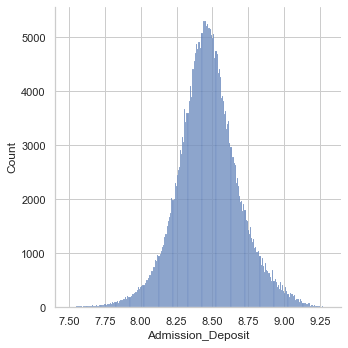

In [526]:
sns.displot(x = np.log(raw_train_data.Admission_Deposit), kind='hist')

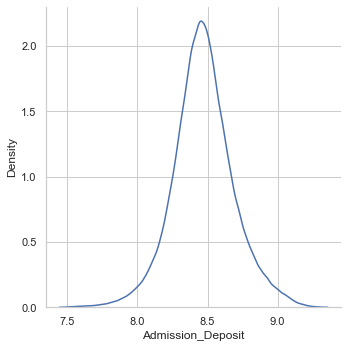

In [527]:
sns.displot(x = np.log(raw_train_data.Admission_Deposit), kind='kde')

(array([  2975.,  26059., 103190., 112815.,  45913.,  16963.,   6939.,
          2729.,    726.,    129.]),
 array([ 1800. ,  2720.8,  3641.6,  4562.4,  5483.2,  6404. ,  7324.8,
         8245.6,  9166.4, 10087.2, 11008. ]),
 <BarContainer object of 10 artists>)

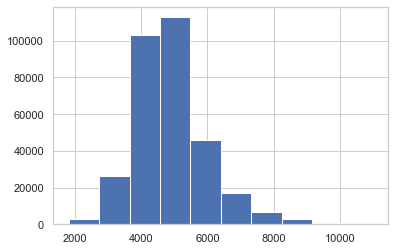

In [528]:
plt.hist(raw_train_data.Admission_Deposit)

In [529]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_train_data['Stay'] = lb.fit_transform(raw_train_data['Stay'])
raw_train_data['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='Stay'>

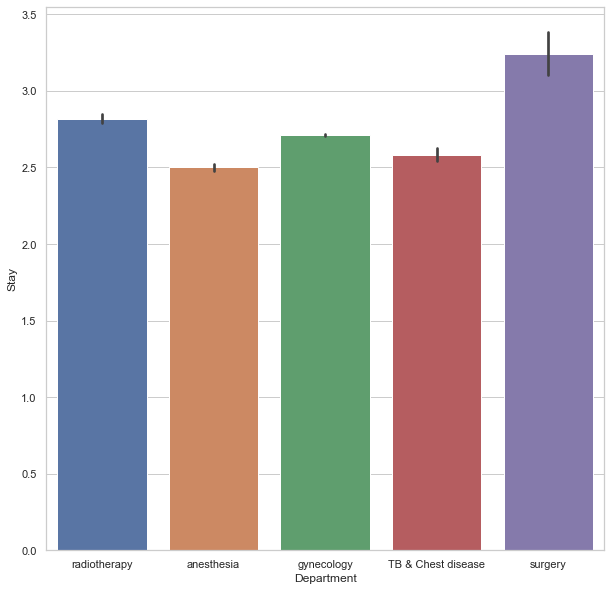

In [530]:
#fig, axs = plt.subplots(ncols=2)
fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(data=raw_train_data, x='Department', y='Stay',ax=ax)
#sns.countplot(data=raw_train_data, x='Department')

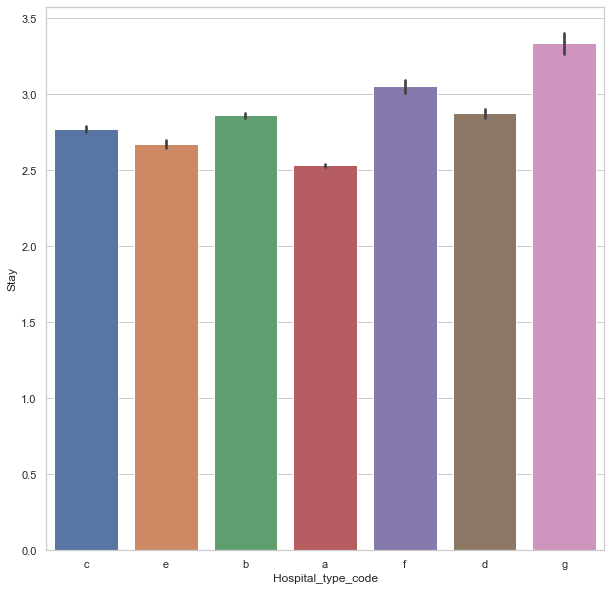

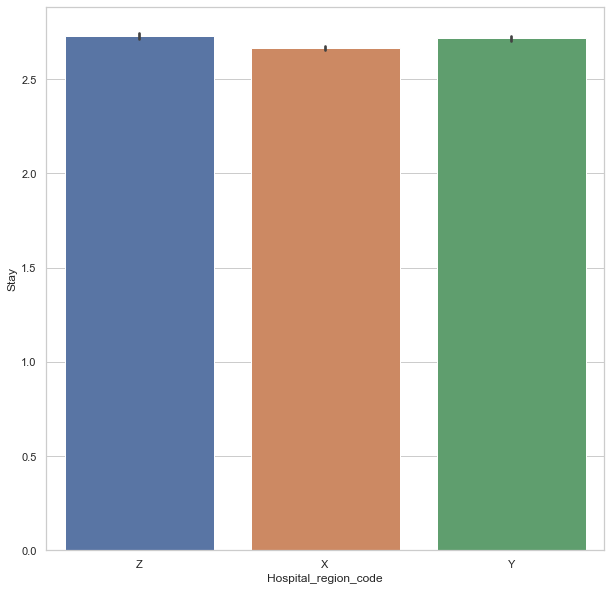

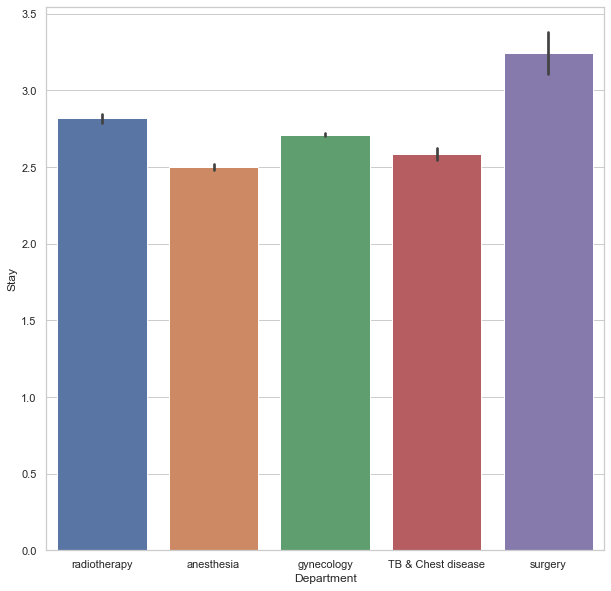

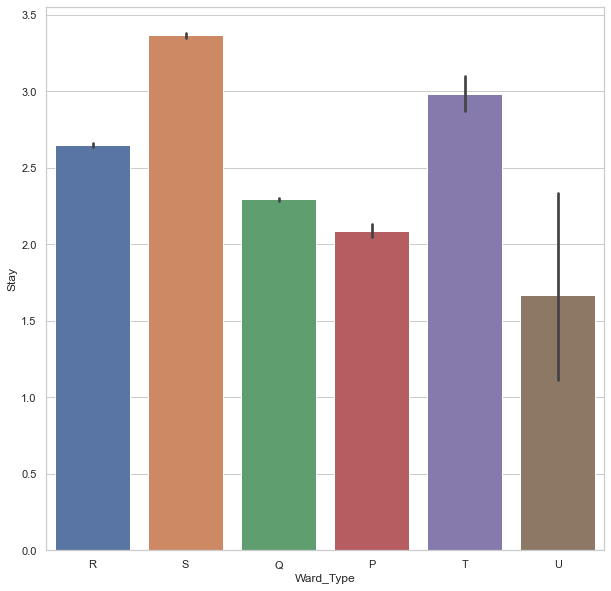

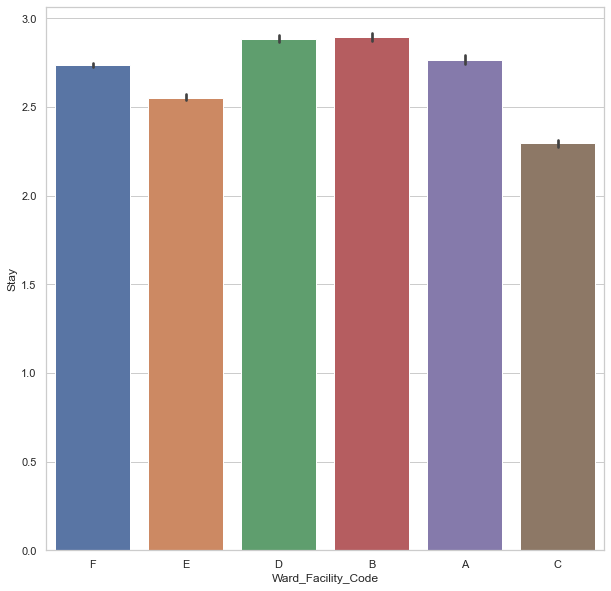

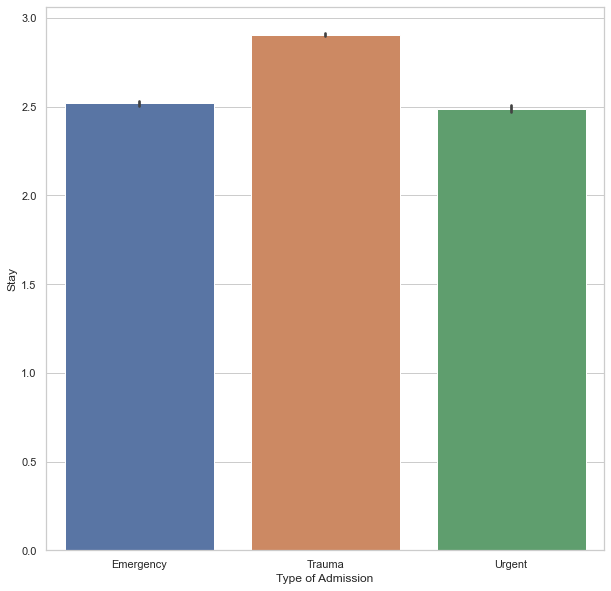

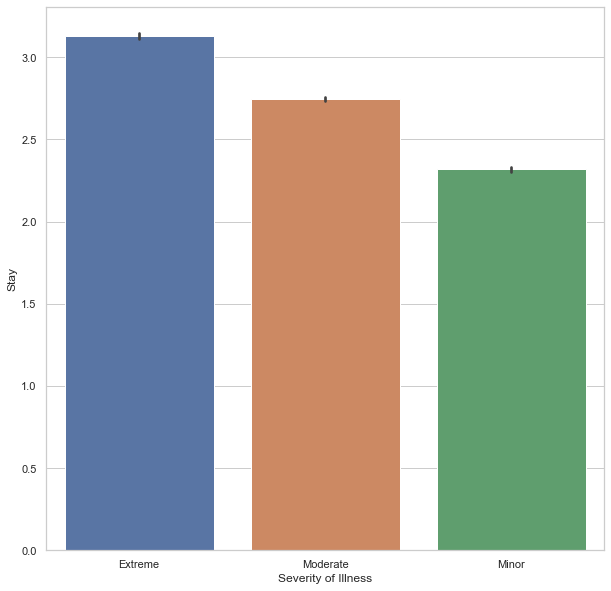

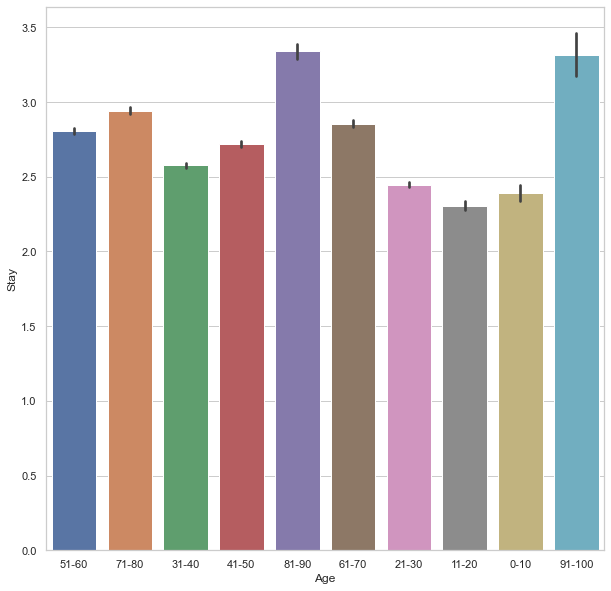

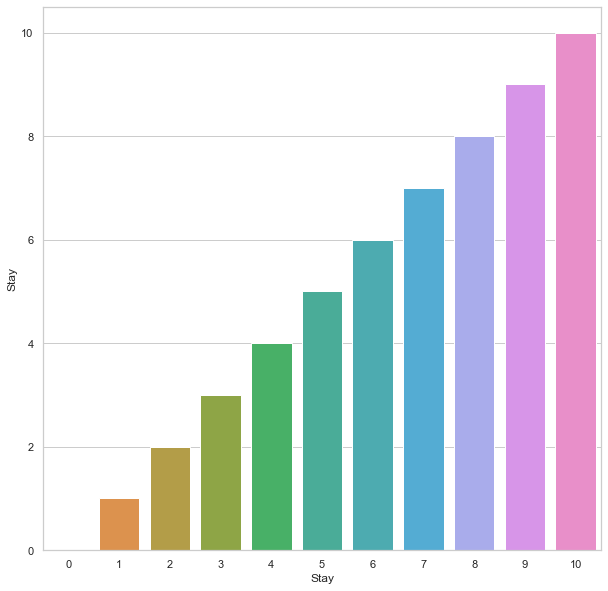

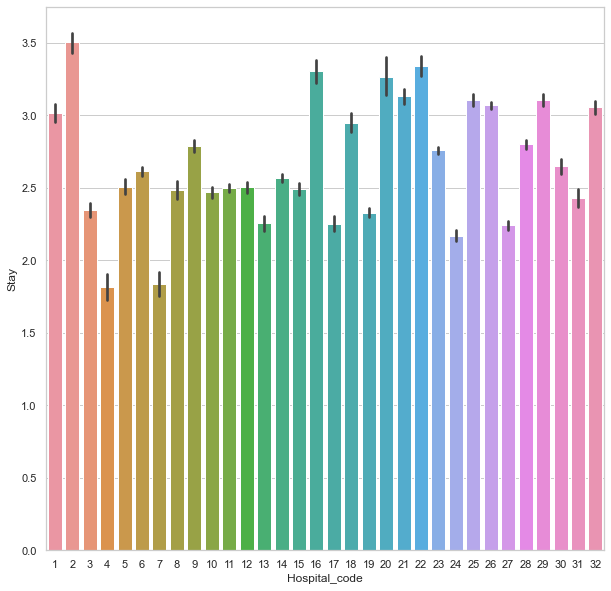

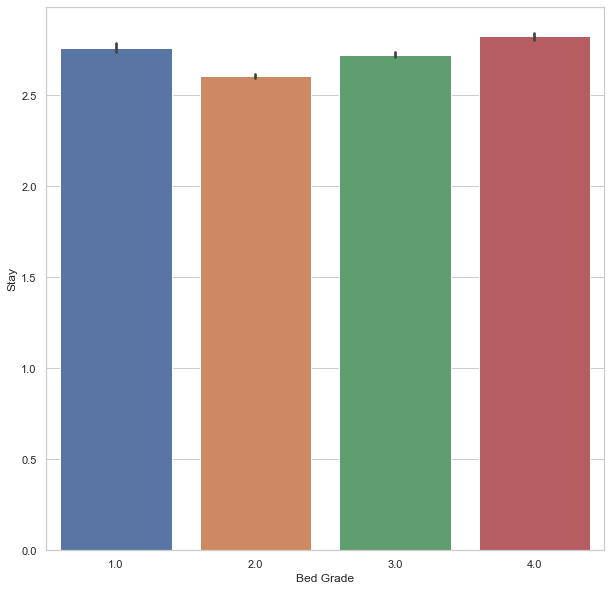

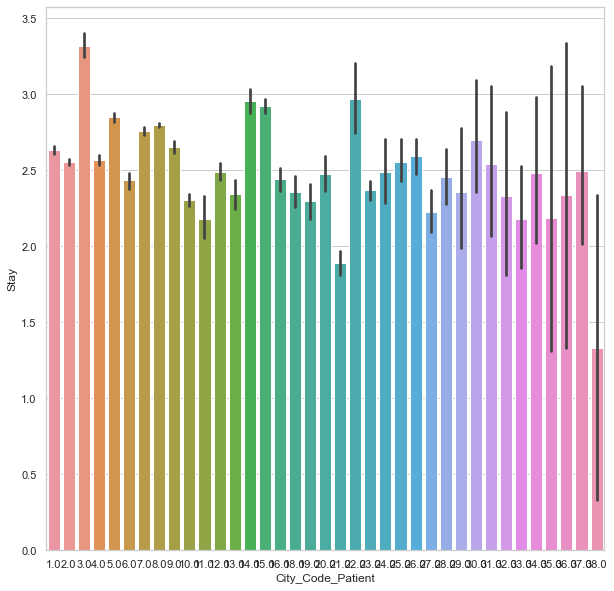

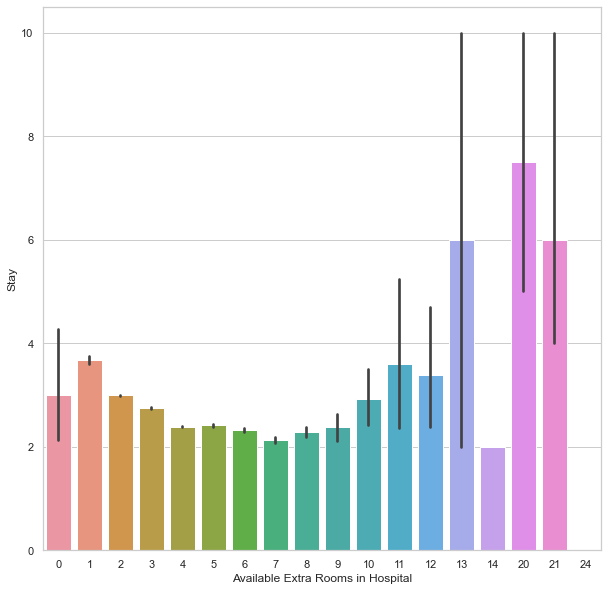

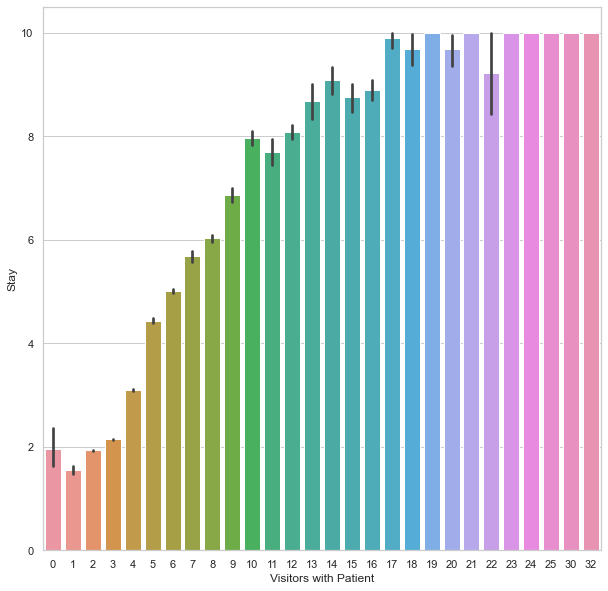

In [531]:
for i in cat_features:
    fig, ax = plt.subplots(figsize=(10,10))
    sns.set_theme(style="whitegrid")
    sns.barplot(data=raw_train_data, x=i, y='Stay',ax=ax)

<AxesSubplot:xlabel='Bed Grade', ylabel='Stay'>

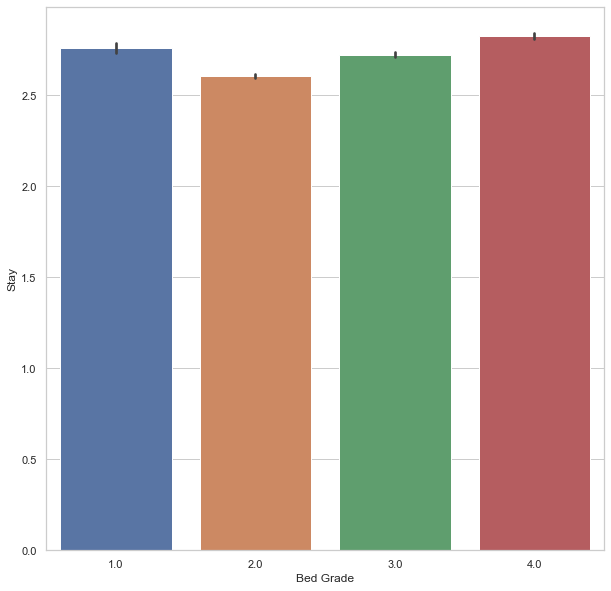

In [532]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(data=raw_train_data, x='Bed Grade', y='Stay',ax=ax)

In [533]:
raw_train_data['Visitors with Patient'].value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
30         9
32         9
Name: Visitors with Patient, dtype: int64

### 4.3 Determine the Data Quality Issues - Missing Values and Outliers

In [534]:
# get the missing values
raw_train_data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [535]:
#There are missing values in Bed Grade and City_Code_Patient which are 0.035% and 1.44%. % of missing values is very less so we can perform imputation without any hesistation.

| Feature | Data Quality Issues | Potential Handling Strategies |
| ----------- | ----------- | ----------- |
| Bed Grade | 113 Missing Values | 0.035% missing values. We are not dropping any data. We will perform imputation with Median. |
| City_Code_Patient | 4532 Missing Values | 1.44% missing values. We are not dropping any data. We will perform imputation with Median|

### 4.4 Handling Data Quality Issues

In [536]:
# handling missing values on Bed Grade
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
si.fit(raw_train_data[['Bed Grade']])
raw_train_data['Bed Grade'] = si.transform(raw_train_data[['Bed Grade']])
raw_train_data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [538]:
# handling missing values on City_Code_Patient
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
si.fit(raw_train_data[['City_Code_Patient']])
raw_train_data['City_Code_Patient'] = si.transform(raw_train_data[['City_Code_Patient']])
raw_train_data.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## 4.4 Data Preperation

> We will use encodings on following descriptive features: 
     Age,
     Severity of Illness,
     Bed Grade,
     City_Code_Patient.

In [539]:
# encoding on age
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_train_data['Age'] = lb.fit_transform(raw_train_data['Age'])
raw_train_data['Age']

0         5
1         5
2         5
3         5
4         5
         ..
318433    4
318434    8
318435    7
318436    1
318437    1
Name: Age, Length: 318438, dtype: int64

#### Encoding Severity of Illness: 
0: Extreme
1: Moderate
2: Minor

In [540]:
# encoding on severity of illness
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_train_data['Severity of Illness'] = lb.fit_transform(raw_train_data['Severity of Illness'])
raw_train_data['Severity of Illness']

0         0
1         0
2         0
3         0
4         0
         ..
318433    2
318434    2
318435    1
318436    1
318437    1
Name: Severity of Illness, Length: 318438, dtype: int64

In [541]:
# sns.scatterplot(data=raw_train_data, y='Admission_Deposit', x='Stay')

<!-- #### Stay encoding: 

0-10: 0,


11-20: 1,


21-30: 2,


31-40: 3,


41-50: 4,


51-60: 5,


61-70: 6,
.
.
.
. -->

In [542]:
# finally printing data
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,0,2,5,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,0,2,5,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,0,2,5,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,0,2,5,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,2,3,4,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,2,4,8,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,1,3,7,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,1,5,1,3761.0,1
